# Bouncing balls!
> Figuring out collision for circles and properly reacting to it.

- toc: true 
- badges: true
- comments: true
- categories: [physic]

# Quick introduction

Recently I have decided to write a python mini physic/game/graphic engine, but I was struggling with implementing geometry concepts (analytical geometry) to the code, and so I decided to write a bunch of small projects on a similar theme, where one of them was this one.

Once I finally grasped the translation between geometry concept to the code, and I was able to finish other projects without any problems.

In [5]:
#hide
import matplotlib.pyplot as plt

# Theory of collision

When creating a circle we need only two parameters: coordinations (x, y) and radius. This is also enough to determine collision and later even response (including the vector of velocity).

In [ ]:
#hide
p1, p2 = (-0.19, -0.1), (0.13, 0.16)

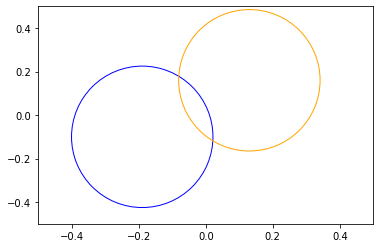

In [41]:
#hide-input
plt.scatter(*p1, s=20000, facecolors='none', edgecolors='blue')
plt.scatter(*p2, s=20000, facecolors='none', edgecolors='orange')

plt.xlim(-0.5 , 0.5) 
plt.ylim(-0.5 , 0.5) 
plt.show()

We have two circles that are colliding, but to find out if this case is true, we can use the Pythagorean theory.

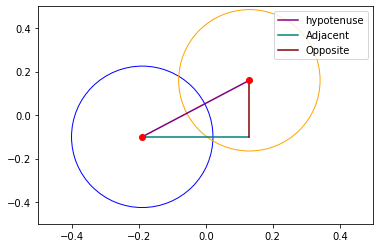

In [62]:
#hide-input
# circle
plt.scatter(*p1, s=20000, facecolors='none', edgecolors='blue')
plt.scatter(*p2, s=20000, facecolors='none', edgecolors='orange')
# line
plt.plot([p1[0], p2[0]], [p1[1], p2[1]], "purple")
plt.plot([p1[0], p2[0]], [p1[1], p1[1]], "teal")
plt.plot([p2[0], p2[0]], [p1[1], p2[1]], "maroon")
# points
plt.plot(*p1, "r", marker="o")
plt.plot(*p2, "r", marker="o")


plt.xlim(-0.5 , 0.5) 
plt.ylim(-0.5 , 0.5)
plt.legend(["hypotenuse", "Adjacent", "Opposite"])
plt.show()

By squaring 'adjacent' and 'opposite' and adding them together, we get a squared hypotenuse.

$$\text{hypotenuse}^2 = \text{adjacent}^2 + \text{opposite}^2$$

$$\text{c}^2 = \text{a}^2 + \text{b}^2$$

$$\text{c} = \sqrt{\text{a}^2 + \text{b}^2}$$

It's quite easy to get 'adjacent' and 'opposite' because we operate on a plane with a `Cartesian coordinate system`, we take coordinations of both circles and deduct from each other.

$$\text{dx} = \text{Circle2.x} - \text{Circle1.x}$$
$$\text{dy} = \text{Circle2.y} - \text{Circle1.y}$$

Then we can calculate the 'hypotenuse'.

$$\text{distance} = \sqrt{\text{dx}^2 + \text{dy}^2}$$

$$\text{OR}$$

$$\text{distance} = \text{math.hypot(dx, dy)}$$

With this, we get a one-dimensional distance between those two circles. We just need to sum the radius of the first and the second circles. If the hypotenuse is smaller than the sum of their radiuses that it's a collision

This was easy stuff, but more tricky is to figure out how they would bounce from each other.

## Response

We have to assume that both circles have some velocity (vector with x and y value that each loop move circle).

Theoretically, two circles collide on an infinitely small point. The collision would be exactly in the middle of 'hypotenuse', which would be the distance between those two circles. We then flip 'hypotenuse' about 180 degrees (this would be arctangent).

$$\text{tangent} = \text{math.atan2(dy, dx)}$$

> Note: Tangent is a straight line that shares only one point on some circle

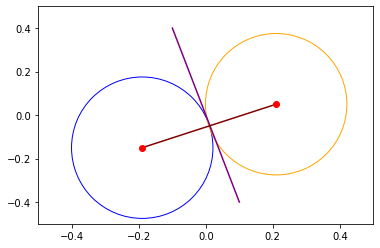

In [103]:
#hide-input
# circle
p1, p2 = (-0.19, -0.15), (0.21, 0.05)
plt.scatter(*p1, s=20000, facecolors='none', edgecolors='blue')
plt.scatter(*p2, s=20000, facecolors='none', edgecolors='orange')
# line

plt.plot([-0.1, 0.1], [0.4, -0.4], "purple")
plt.plot([p1[0], p2[0]], [p1[1], p2[1]], "maroon")
# points
plt.plot(*p1, "r", marker="o")
plt.plot(*p2, "r", marker="o")


plt.xlim(-0.5 , 0.5) 
plt.ylim(-0.5 , 0.5)
plt.show()

This tangent will now act as sort of a wall. From this wall, we will be able to determine the direction of the bounce.

When you throw a small ball on the floor it will bounce back, but its velocity would mirror the other side of an imagined wall that is rectangular to the floor. Simple physic. Same we will do here.

We also need to address that if we would run a program, then the circles would get stuck into each other. That's because we assume collision on an infinitely small point, but we can't afford to compute this point, so when a collision is true we compute bounce by approximation of that point. When running a program it will be for the human eye basically undetectable to see that approximated point.

So we need to get the right angle.

$$\text{angle} = \text{1/2} * \text{math.pi} + \text{tangent}$$

Pi is 180 degree, so `tangent + 90 degree` will give us the angle we want and then we use the function of sinus and cosines to 'mirror' velocity to simulate bouncing from each other.

$$\text{Circle1.velocity.x  -=  math.sin(angle)}$$
$$\text{Circle1.velocity.y  +=  math.cos(angle)}$$
$$\text{Circle2.velocity.x  +=  math.sin(angle)}$$
$$\text{Circle2.velocity.y  -=  math.cos(angle)}$$

That's it.

If you're not familiar with sinus and cosines, then you can check the source [here](https://www.khanacademy.org/math/trigonometry), but let's say you have a circle with position (0, 0) and radius 1. If you take some point on the circle you can project it on the y-axis with sinus function or on the x-axis with sinus function. This is possible with Pythagorean theory and with this, we can find the angle of a triangle (that is plotting sinus and cosines).

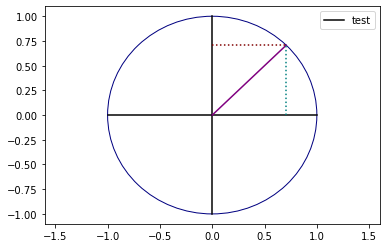

In [175]:
#hide-input
# circle & plot
c1 = plt.Circle((0, 0), 1, color="navy", fill=False)
fig, ax = plt.subplots()
ax.set_xlim((-1.6, 1.6))
ax.set_ylim((-1.1, 1.1))

# lines
plt.plot([0, 0], [-1, 1], color="black")
plt.plot([-1, 1], [0, 0], color="black")
plt.plot([0, 0.7071], [0, 0.7071], color="purple")
plt.plot([0, 0.7071], [0.7071, 0.7071], color="maroon", linestyle=':')
plt.plot([0.7071, 0.7071], [0, 0.7071], color="teal", linestyle=':')

ax.add_patch(c1)

plt.show()

In this case, we have an angle of 45 degrees, where both sinus and cosines return the same output: `(sqrt(2)/2)`.

# Code

Code is design for python 3, but there shouldn't be any troubles following in different language.

## GUI

For simplicity, we will go with pygame as GUI. 

First, we import libraries:

In [ ]:
#hide-output
import pygame
from sys import exit

First, we need to define the size of the window and the frame rate per seconds of that window.

In [ ]:
#hide-output
# pygame & simulation limitation settings
FPS = 60
SIZE = 700
WSIZE = (SIZE, SIZE)

We then initiate pygame.

In [ ]:
#hide-output
# init pygame
pygame.init()
pygame.display.set_caption("Bouncing balls") # set a name
screen = pygame.display.set_mode(WSIZE) # create window
clock = pygame.time.Clock() # create in-game time (for FPS)

Now we can create the main loop, where the whole program will compute and display results. With the pygame, we also need to create an event (this is for exiting window or pressing keys).

In [ ]:
#hide-output
while 1:
    clock.tick(FPS) # setting in-game time

    # pygame event (closing window)
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            exit()
    #... (physic)

The only thing we need to write is small iterations, where we will draw all circles and update the display (also what you draw in pygame stays on display, so we need to redraw it to the background colour).

In [ ]:
#hide-output
    #... (physic)
    screen.fill((0, 0, 0)) # RGB color of BLACK
    """
    for b in balls:
        pygame.draw.circle(screen, b.color, b.pos, b.radius) # choose window to draw on; color of circle; position of circle; radius of circle
    """
    pygame.display.flip() # update display

The last thing to do is to create circles so we could draw them.

## PHYSIC

Before the main loop, we need to set up some variables for the determining style of simulation. Here we want circles of different sizes but with the same weight and with gravity to play its role.

In [ ]:
#hide-output
GRAVITY = 0.05
generate_circles = 40
MAX_RADIUS = 40

We also import basic libraries:

In [ ]:
#hide-output
from random import randint, uniform
import math

We generate a list of Circles (as a class), where later in the main loop we will update its positions.

In [ ]:
#hide-output
# generate circles
balls = [Circle() for _ in range(generate_circles)]

Before we can utilize it, we need to create that class of Circle. We also use `randint` and `uniform` function for generating random parameters. We use it to generate radius, position (as a tuple), velocity (also x, y), colour (Red, Green, Blue).

In [ ]:
#hide-output
class Circle:
    def __init__(self):
        self.radius = randint(10, MAX_RADIUS)
        self.pos = (randint(MAX_RADIUS, SIZE-MAX_RADIUS), randint(MAX_RADIUS, SIZE-MAX_RADIUS)) # SIZE is max size of window (GUI)
        self.vel = (uniform(0, 0.1), uniform(0, 0.1))
        self.color = (randint(32, 255), randint(32, 255), randint(32, 255)) # RGB

Now it would be helpful to create two functions for updating position and velocity:

In [ ]:
#hide-output
    def update_vel(self, vector):
        x,y = self.vel
        self.vel = (x+vector[0], y+vector[1])

    def update_pos(self):
        px, py = self.pos
        x, y = self.vel[0]+px, self.vel[1]+py
        self.pos = (x, y)

And now we can construct the main function for collision and bounce:

In [ ]:
#hide-output
    def collision(self, other):
        dx = other.pos[0] - self.pos[0]
        dy = other.pos[1] - self.pos[1]
        distance = math.hypot(dx, dy) # --> math.sqrt(dx**2 + dy**2)

        if distance < self.radius+other.radius:
            #...

We now know if a collision occurs; if yes then we need to change velocity (and update position so they would go further from each other):

In [ ]:
#hide-output
            # get angle for bouncing
            tangent = math.atan2(dy, dx)
            angle = (0.5 * math.pi + tangent)
            
            # get velocity of both circles
            self_x, self_y = self.vel
            other_x, other_y = other.vel

            # move vectors based on new angle (for velocity)
            self_x -= math.sin(angle)
            self_y += math.cos(angle)
            other_x += math.sin(angle)
            other_y -= math.cos(angle)
            
            # update
            self.vel = (self_x, self_y)
            self.update_pos()
            other.vel = (other_x, other_y)
            other.update_pos()

The class is constructed. The only missing piece is creating logic for updating simulation in the main loop:

In [ ]:
#hide-output
while 1:
    #... (GUI)
    # update circles (physic)
    for b1 in balls:
        for b2 in balls:
            if b1 == b2: continue # skip it self
            # bounce out of collision
            b1.collision(b2)

When checking for a collision we want to check the selected circle with each other circle (except itself):

In [ ]:
#hide-output
        # move down by gravity
        b1.update_vel((0, GRAVITY))

        # update pos
        b1.update_pos()

After checking with each circle we also apply gravity for that selected circle (which is vector going down (technically up)):

In [ ]:
#hide-output
        # pos
        x, y = b1.pos
    
        # bounce of walls
        vx, vy = b1.vel
        if x+b1.radius > SIZE and vx != abs(vx) * -1: vx *= -1
        elif x-b1.radius < 0  and vx == abs(vx) * -1: vx *= -1
        if y+b1.radius > SIZE and vy != abs(vy) * -1: vy *= -1
        elif y-b1.radius < 0  and vy == abs(vy) * -1: vy *= -1
        b1.vel = (vx, vy)

        # update pos
        b1.update_pos()
    #... (GUI)

A small detail is to restrict it to the window so it wouldn't fly off and final update of position.

Now the code is complete.

## Result

After putting everything together you should get something similar to this.

![](https://user-images.githubusercontent.com/57571014/121608985-367a1980-ca53-11eb-8c3f-c19ec78bec90.gif)

If you want, you can play with parameters, or you can change settings, where your mouse controls the position and velocity of a targeted circle and so on...

You can check the whole code in this [repository](https://github.com/ludius0/simulations/tree/main/physics/bouncing_balls.py).

# Conclusion

Hope it helps. It was quite fun to create this small project that use analytic geometry to figure out something that seems simple and write it in a few lines in python.